IMPORTAÇÃO DE BIBLIOTECAS

In [40]:
from urllib.request import urlopen
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

FAZENDO REQUISIÇÃO NA API

In [41]:
response = urlopen("https://coronavirus.m.pipedream.net/").read()
dados = json.loads(response)
dados_covid = dados['rawData']

CRIANDO FUNÇÃO QUE FILTRA OS DADOS DO BRASIL

In [42]:
# dados_brasil = []
# for dados in dados_covid:
#     if  dados['Country_Region'] == 'Brazil':
#         dados_brasil.append(dados)
# print(dados_brasil)        
def filtra_dados(dados):
    if dados['Country_Region'] == 'Brazil':
        return True
    else:
        return False

dados_brasil = list(filter(filtra_dados,dados_covid))
print(dados_brasil)

[{'FIPS': '', 'Admin2': '', 'Province_State': 'Acre', 'Country_Region': 'Brazil', 'Last_Update': '2023-03-10 04:21:03', 'Lat': '-9.0238', 'Long_': '-70.812', 'Confirmed': '160433', 'Deaths': '2043', 'Recovered': '', 'Active': '', 'Combined_Key': 'Acre, Brazil', 'Incident_Rate': '18191.02314796442', 'Case_Fatality_Ratio': '1.2734287833550455'}, {'FIPS': '', 'Admin2': '', 'Province_State': 'Alagoas', 'Country_Region': 'Brazil', 'Last_Update': '2023-03-10 04:21:03', 'Lat': '-9.5713', 'Long_': '-36.782', 'Confirmed': '337535', 'Deaths': '7242', 'Recovered': '', 'Active': '', 'Combined_Key': 'Alagoas, Brazil', 'Incident_Rate': '10113.841581826577', 'Case_Fatality_Ratio': '2.1455552757491816'}, {'FIPS': '', 'Admin2': '', 'Province_State': 'Amapa', 'Country_Region': 'Brazil', 'Last_Update': '2023-03-10 04:21:03', 'Lat': '0.902', 'Long_': '-52.003', 'Confirmed': '185668', 'Deaths': '2167', 'Recovered': '', 'Active': '', 'Combined_Key': 'Amapa, Brazil', 'Incident_Rate': '21953.552607152866', 'C

FILTRANDO OS DADOS COM OS VALORES para os gráficos

In [44]:
dadosgrafico={}

for dados in dados_brasil:
    dadosgrafico[dados['Province_State']] = {
        'Confirmados':dados['Confirmed'],
        'Mortes':dados['Deaths']
    }
print(dadosgrafico)

{'Acre': {'Confirmados': '160433', 'Mortes': '2043'}, 'Alagoas': {'Confirmados': '337535', 'Mortes': '7242'}, 'Amapa': {'Confirmados': '185668', 'Mortes': '2167'}, 'Amazonas': {'Confirmados': '631976', 'Mortes': '14443'}, 'Bahia': {'Confirmados': '1792572', 'Mortes': '31459'}, 'Ceara': {'Confirmados': '1453572', 'Mortes': '28157'}, 'Distrito Federal': {'Confirmados': '897897', 'Mortes': '11844'}, 'Espirito Santo': {'Confirmados': '1323318', 'Mortes': '15041'}, 'Goias': {'Confirmados': '1898605', 'Mortes': '28036'}, 'Maranhao': {'Confirmados': '493391', 'Mortes': '11053'}, 'Mato Grosso': {'Confirmados': '878360', 'Mortes': '15087'}, 'Mato Grosso do Sul': {'Confirmados': '607356', 'Mortes': '11010'}, 'Minas Gerais': {'Confirmados': '4189760', 'Mortes': '65507'}, 'Para': {'Confirmados': '871612', 'Mortes': '19021'}, 'Paraiba': {'Confirmados': '707743', 'Mortes': '10542'}, 'Parana': {'Confirmados': '2918459', 'Mortes': '46018'}, 'Pernambuco': {'Confirmados': '1156640', 'Mortes': '22686'}, 

CRIANDO LISTAS PARA SEREM PLOTADOS NO GRÁFICO DE BARRAS

In [45]:
grafico_estados     = []
grafico_mortes      = []
grafico_confirmados = []

for chave in dadosgrafico:
    grafico_estados.append(chave)
    grafico_mortes.append(int(dadosgrafico[chave]['Mortes']))
    grafico_confirmados.append(int(dadosgrafico[chave]['Confirmados']))

In [59]:

def intervalo(dados_intervalo):
    positions=[0]
    maximo =  max(dados_intervalo)
    divisor = str(maximo)[0]
    intervalo = maximo / int(divisor)
    soma = 0
    while soma < maximo:
        soma += intervalo
        positions.append(round(mt.ceil(soma) / 1000000) * 1000000)
    return positions

print(intervalo(grafico_confirmados))

[0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 8000000]


PLOTANDO EM UM GRAFICO DE BARRAS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


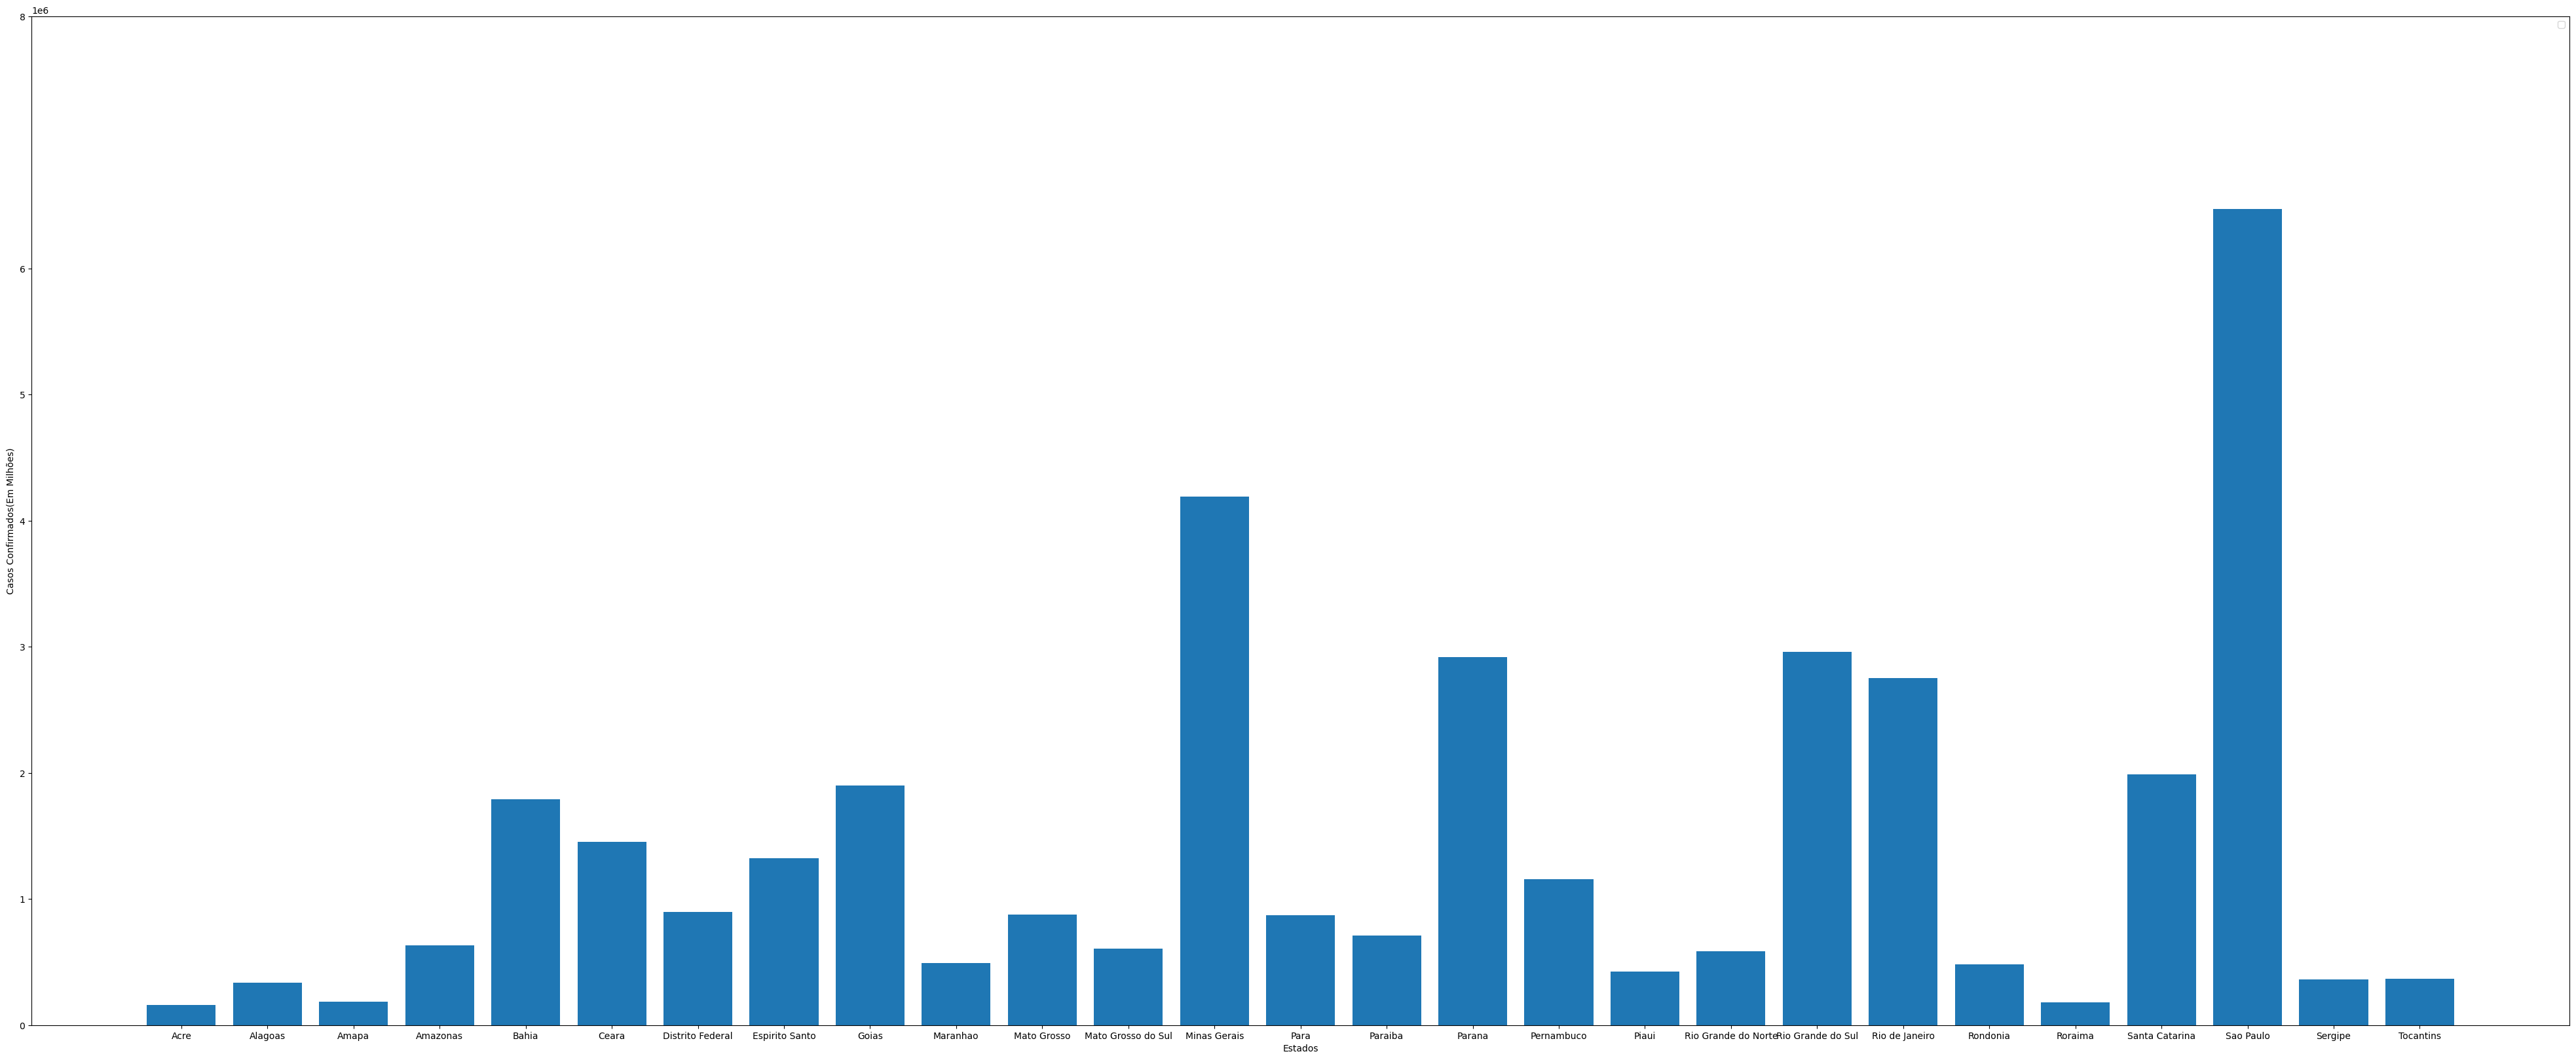

In [61]:
plt.figure(figsize=(50, 20))
plt.bar(grafico_estados,grafico_confirmados)
plt.ylabel('Casos Confirmados(Em Milhões)')
plt.xlabel('Estados')
plt.yticks(intervalo(grafico_confirmados))
plt.legend()
plt.show()